In [50]:
# Imports

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# creating a dataframe and importing data

df = pd.read_csv("../data/aac_intakes_outcomes.csv")

In [3]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [4]:
df.shape

(79672, 41)

In [5]:
# Looking at the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekday             796

In [40]:
columns = df.columns

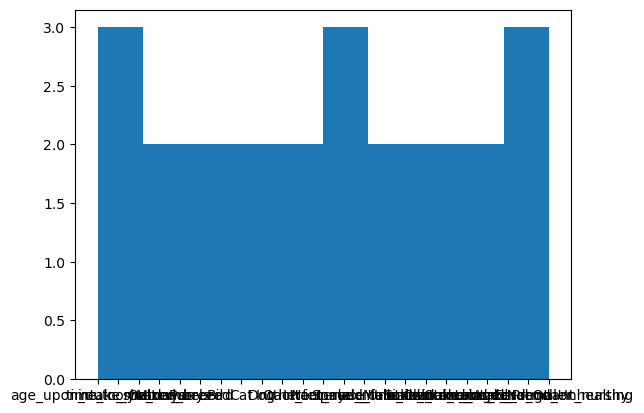

In [52]:
plt.hist(columns)
plt.show()

In [6]:
# Removing unecessary columns

df = df.drop(["outcome_subtype", "animal_id_outcome", "date_of_birth", "age_upon_outcome_(years)", "age_upon_outcome_age_group", "outcome_datetime", "age_upon_outcome", "outcome_month", "outcome_year", "outcome_monthyear", "outcome_weekday", "outcome_hour", "outcome_number", "dob_year", "dob_month", "dob_monthyear", "age_upon_intake", "animal_id_intake", "found_location", "intake_type", "sex_upon_intake", "count", "age_upon_intake_(days)", "age_upon_intake_(years)", "age_upon_intake_age_group", "intake_datetime", "intake_month", "intake_monthyear", "outcome_year", "intake_weekday", "intake_hour", "intake_number", "time_in_shelter"], axis='columns')

In [31]:
df.head()

,age_upon_outcome_days,intake_year,time_in_shelter_days,Outcome,Mixed_breed,Purebred,Bird,Cat,Dog,Other,...,Spayed_female,sex_Unknown,Multi_Colour,Solid_Colour,intake_cond_Aged,intake_cond_Feral,intake_cond_Normal,intake_cond_Other,intake_cond_Pregnant_nursing,intake_cond_Unhealthy
0,3650,2017,0.588194,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2555,2014,1.259722,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,2190,2014,1.113889,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,3650,2014,4.970139,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,5840,2013,0.119444,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
# Viewing and dropping null values

df = df.dropna()
nan_count = df.isna().sum()
print(nan_count )

outcome_type               0
sex_upon_outcome           0
age_upon_outcome_(days)    0
animal_type                0
breed                      0
color                      0
intake_condition           0
intake_year                0
time_in_shelter_days       0
dtype: int64


In [9]:
# Renaming some of the columns

df = df.rename(columns={'sex_upon_outcome': 'sex', 'age_upon_outcome_(days)': 'age_upon_outcome_days', 'intake_condition': 'intake_cond', 'animal_type': 'type' })

In [10]:
# Looking at unique values for the target variable

df["outcome_type"].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', 'Relocate'], dtype=object)

In [11]:
# Fixing the 'outcome_type' target variable to binary (Adoption/No adoption)

df.replace(["Return to Owner", "Transfer", "Euthanasia", "Died", "Rto-Adopt", "Missing", "Disposal", "Relocate"],
           "No", 
           inplace=True)

df.replace("Adoption",
           "Yes", 
           inplace=True)

# Remove any null values

df = df.dropna(subset=['outcome_type'])

df["outcome_type"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# Encoding target variable

# Creating an instance of label Encoder
le = LabelEncoder()
 
# Using .fit_transform function to fit label encoder and return encoded label
label = le.fit_transform(df['outcome_type'])
 
# printing label
label

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# removing the column 'outcome_type' from df
# as it is of no use now.
df.drop("outcome_type", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Outcome'
df["Outcome"] = label
 
# printing Dataframe
df.head()

,sex,age_upon_outcome_days,type,breed,color,intake_cond,intake_year,time_in_shelter_days,Outcome
0,Neutered Male,3650,Dog,Spinone Italiano Mix,Yellow/White,Normal,2017,0.588194,0
1,Neutered Male,2555,Dog,Spinone Italiano Mix,Yellow/White,Normal,2014,1.259722,0
2,Neutered Male,2190,Dog,Spinone Italiano Mix,Yellow/White,Normal,2014,1.113889,0
3,Neutered Male,3650,Dog,Dachshund,Tricolor,Normal,2014,4.970139,0
4,Neutered Male,5840,Dog,Shetland Sheepdog,Brown/White,Injured,2013,0.119444,0


In [14]:
# Ensuring our target variable is well-balanced

df['Outcome'].value_counts(dropna=False)

Outcome
0    46067
1    33594
Name: count, dtype: int64

In [15]:
# Grouping values together for columns with a large amount of categories

# 'color' column
df.replace(["Black", "Blue Smoke", "Liver", "Orange", "Tan", "Red", "Yellow", "White", "Brown", "Gold", "Blue", "Chocolate", "Apricot", "Gray", "Black Smoke", "Buff", "Silver", "Fawn", "Green", "Pink"],
           "Solid Colour", 
           inplace=True)

In [16]:
df.loc[df['color'] != "Solid Colour", 'color'] = 'Multi-Colour'

In [17]:
df['color'].unique()

array(['Multi-Colour', 'Solid Colour'], dtype=object)

In [18]:
# 'breed' column

df.loc[df['breed'].str.contains(r"Mix"), 'breed'] = 'Mixed-breed'
df.loc[df['breed'].str.contains(r"/"), 'breed'] = 'Mixed-breed'
df.loc[df['breed'] != "Mixed-breed", 'breed'] = 'Purebred'

df['breed'].value_counts(dropna=False)

breed
Mixed-breed    74269
Purebred        5392
Name: count, dtype: int64

In [19]:
# 'intake_cond' column

df.replace(['Nursing','Pregnant'],
           "Pregnant/nursing", 
           inplace=True)
df.replace(['Injured','Sick'],
           "Unhealthy", 
           inplace=True)
df['intake_cond'].value_counts(dropna=False)

intake_cond
Normal              70046
Unhealthy            7095
Pregnant/nursing     1962
Aged                  319
Other                 147
Feral                  92
Name: count, dtype: int64

In [20]:
# Creating dummy variables for categorical columns

df = pd.get_dummies(df, columns=["breed", "type", "sex", "color", "intake_cond"], dtype = int)

In [21]:
df.head()

,age_upon_outcome_days,intake_year,time_in_shelter_days,Outcome,breed_Mixed-breed,breed_Purebred,type_Bird,type_Cat,type_Dog,type_Other,...,sex_Spayed Female,sex_Unknown,color_Multi-Colour,color_Solid Colour,intake_cond_Aged,intake_cond_Feral,intake_cond_Normal,intake_cond_Other,intake_cond_Pregnant/nursing,intake_cond_Unhealthy
0,3650,2017,0.588194,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2555,2014,1.259722,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,2190,2014,1.113889,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,3650,2014,4.970139,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,5840,2013,0.119444,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
# Renaming columns

df = df.rename(columns={'breed_Mixed-breed': 'Mixed_breed', 'breed_Purebred': 'Purebred', 'type_Bird': 'Bird', 'type_Cat': 'Cat', 'type_Dog': 'Dog', 'type_Other': 'Other', 'sex_Spayed Female': 'Spayed_female', 'sex_Intact Female': 'Intact_female', 'sex_Neutered Male': 'Neutered_male', 'sex_Intact Male': 'Intact_male', 'sex_': 'Neutered_male', 'intake_cond_Pregnant/nursing': 'intake_cond_Pregnant_nursing', 'color_Multi-Colour': 'Multi_Colour', 'color_Solid Colour': 'Solid_Colour'  })

In [29]:
df.columns

Index(['age_upon_outcome_days', 'intake_year', 'time_in_shelter_days',
       'Outcome', 'Mixed_breed', 'Purebred', 'Bird', 'Cat', 'Dog', 'Other',
       'Intact_female', 'Intact_male', 'Neutered_male', 'Spayed_female',
       'sex_Unknown', 'Multi_Colour', 'Solid_Colour', 'intake_cond_Aged',
       'intake_cond_Feral', 'intake_cond_Normal', 'intake_cond_Other',
       'intake_cond_Pregnant_nursing', 'intake_cond_Unhealthy'],
      dtype='object')

In [28]:
# Saving dataset into csv file

df.to_csv("cleaned_data.csv", index = False)